<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Gabaritos/Lista_HW_06_Gabarito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EQE 358- Métodos Numéricos Aplicados a Processos Químicos
##Lista de Exercícios 06 – Entrega 11/10/2023
###Prof. Pedro Constantino

### Problema 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def metodo_euler_explicito(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(x,y)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        y[i+1] = y[i] + h * getf(x[i], y[i]) # Atualiza o valor de y usando o método de Euler explícito
        x[i+1] = x[i] + h                    # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y

def metodo_crank_nicolson(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos a serem dados
    # h = tamanho do passo
    # Requer a função getf(x,y) e getdf(x,y)

    # Inicializar os vetores de saída para x e y
    x = np.zeros(n)
    y = np.zeros(n)

    # Definir condição iniciais do PVI e tolerância
    x[0] = x0
    y[0] = y0
    tol = 1e-8

    for i in range(0,n-1):

        # Inicializar contador e chute inicial para y[i+1] (Método de Continuação de Ordem Zero)
        k = 0
        y[i+1] = y[i]
        x[i+1] = x[i] + h

        # Calcular f e df do Método de Crank-Nicolson no chute inicial de y[i+1]
        R = y[i+1]-y[i]-(h/2)*(getf(x[i], y[i])+getf(x[i+1], y[i+1]))
        dR = 1-(h/2)*getdf(x[i+1], y[i+1])

        # Fazer iterações de Newton até convergir y[i+1]
        while abs(R) > tol:
            # Atualizar y[i+1] pelo Método de Newton
            y[i+1] = y[i+1] - R / dR

            # Atualizar o contador de Newton e os valores de f e df
            k = k + 1
            R = y[i+1]-y[i]-(h/2)*(getf(x[i], y[i])+getf(x[i+1], y[i+1]))
            dR = 1-(h/2)*getdf(x[i+1], y[i+1])

    return x, y


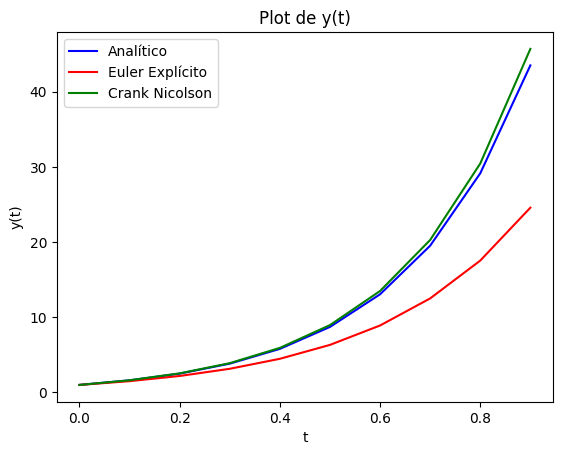

In [ ]:
# Definir a função f(t,y)
def getf(t,y):
    f = 1-t+4*y
    return f

# Definir a derivada de f(t,y)
def getdf(t,y):
    df = 4
    return df

# Definir a solução analítica y(t)
def y_exato(t):
    return (1/4)*t+(19/16)*np.exp(4*t)-(3/16)

t0 = 0      # Escolher o instante inicial
y0 = 1      # Definir a condição inicial
n = 10     # Definir o número de passos
h = 0.1    # Escolher um passo de integração

# Calcular y(t) por Euler Explícito
t, y_exp = metodo_euler_explicito(t0, y0, n, h)

# Calcular y(t) por Crank Nicolson
t, y_CK = metodo_crank_nicolson(t0, y0, n, h)

# Plotar os gráficos
plt.plot(t, y_exato(t), color='blue')
plt.plot(t, y_exp, color='red')
plt.plot(t, y_CK, color='green')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Plot de y(t)')
plt.legend(['Analítico','Euler Explícito','Crank Nicolson' ])
plt.show()

### Problema 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def metodo_euler_implicito(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos a serem dados
    # h = tamanho do passo
    # Requer a função getf(x,y) e getdf(x,y)

    # Inicializar os vetores de saída para x e y
    x = np.zeros(n)
    y = np.zeros(n)

    # Definir condição iniciais do PVI e tolerância
    x[0] = x0
    y[0] = y0
    tol = 1e-8

    for i in range(0,n-1):

        # Inicializar contador e chute inicial para y[i+1] (Método de Continuação de Ordem Zero)
        k = 0
        y[i+1] = y[i]
        x[i+1] = x[i] + h

        # Calcular f e df do Método de Euler Implícito no chute inicial de y[i+1]
        R = y[i+1]-y[i]-h*getf(x[i+1], y[i+1])
        dR = 1-h*getdf(x[i+1], y[i+1])

        # Fazer iterações de Newton até convergir y[i+1]
        while abs(R) > tol:
            # Atualizar y[i+1] pelo Método de Newton
            y[i+1] = y[i+1] - R / dR

            # Atualizar o contador de Newton e os valores de f e df
            k = k + 1
            R = y[i+1] - y[i] - h*getf(x[i+1], y[i+1])
            dR = 1.0 - h*getdf(x[i+1], y[i+1])

    return x, y

def metodo_heun(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(x,y)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Predizer o valor de y usando Euler Explícito
        yp = y[i] + h * getf(x[i], y[i])

        # Corrigir o valor de y usando Euler "Implícito"
        yc = y[i] + h * getf(x[i]+h, yp)

        # Atualizar y[i+1] como a média da predição-correção
        y[i+1] = (yp+yc)/2

        x[i+1] = x[i] + h                    # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y


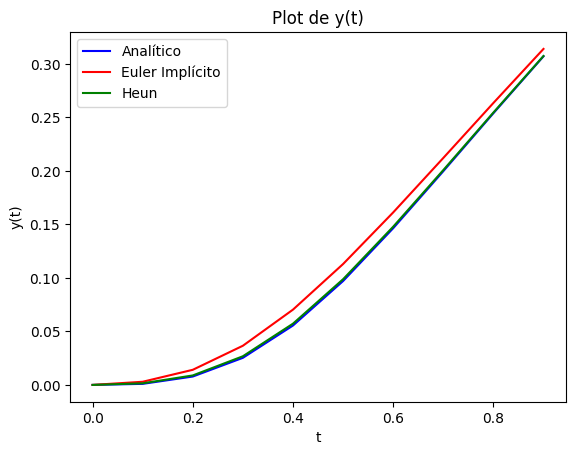

In [ ]:
# Definir a função f(t,y)
def getf(t,y):
    f = 3*(t**2)*(np.exp(-5*y))
    return f

# Definir a derivada de f(t,y)
def getdf(t,y):
    df = -15*(t**2)*(np.exp(-5*y))
    return df

# Definir a solução analítica y(t)
def y_exato(t):
    return (1/5) * np.log(5 * t**3 + 1)

t0 = 0      # Escolher o instante inicial
y0 = 0      # Definir a condição inicial
n = 10     # Definir o número de passos
h = 0.1    # Escolher um passo de integração

# Calcular y(t) por Euler Implícito
t, y_imp = metodo_euler_implicito(t0, y0, n, h)

# Calcular y(t) por Heun
t, y_heun = metodo_heun(t0, y0, n, h)

# Plotar os gráficos
plt.plot(t, y_exato(t), color='blue')
plt.plot(t, y_imp, color='red')
plt.plot(t, y_heun, color='green')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Plot de y(t)')
plt.legend(['Analítico','Euler Implícito','Heun' ])
plt.show()

### Problema 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def metodo_ponto_medio(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(x,y)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Calcular o ponto médio
        xm = x[i] + h/2
        ym = y[i] + (h/2)*getf(x[i],y[i])

        # Atualizar y[i+1] com base no ponto médio
        y[i+1] = y[i] + h * getf(xm,ym)

        x[i+1] = x[i] + h   # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y

def metodo_Runge_Kutta(x0, y0, n, h):
    # x0 = valor inicial para x
    # y0 = valor inicial para y
    # n = número de passos
    # h = tamanho do passo
    # Requer a função getf(y,x)

    # Inicializa o contador e os vetores de saída para x e y
    k = 0
    x = np.zeros(n)
    y = np.zeros(n)

    # Inicializa x e y com os valores iniciais
    x[0] = x0
    y[0] = y0

    # Loop principal para realizar os cálculos
    for i in range(0, n-1):

        # Avaliar as funções de Runge-Kutta
        k1 = getf(x[i],y[i])
        k2 = getf(x[i] + h/2, y[i] + h*k1/2)
        k3 = getf(x[i] + h/2, y[i] + h*k2/2)
        k4 = getf(x[i] + h  , y[i] + h*k3)

        # Atualizar y[i+1] pela média ponderada
        y[i+1] = y[i] + (h/6) *(k1 + 2*k2 + 2*k3 + k4)

        x[i+1] = x[i] + h   # Incrementa o valor de x

    # Retorna os vetores de saída com os valores de x e y calculados
    return x, y

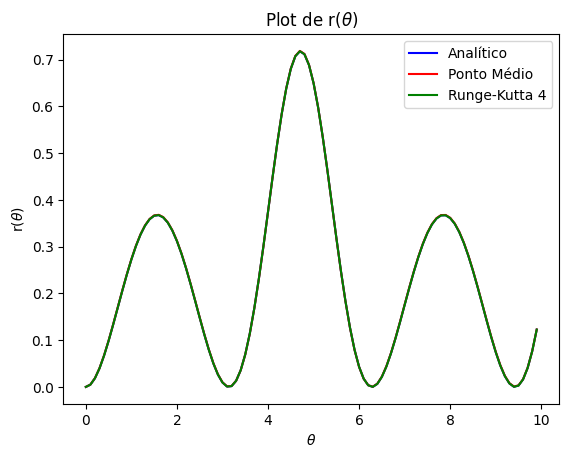

In [ ]:
# Definir a função f(t,y)
def getf(t,y):
    f = (1/2)*(np.sin(2*t))-y*np.cos(t)
    return f

# Definir a derivada de f(t,y)
def getdf(t,y):
    df = -np.cos(t)
    return df

# Definir a solução analítica y(t)
def y_exato(t):
    return np.sin(t)-1+np.exp(-np.sin(t))

t0 = 0      # Escolher o instante inicial
y0 = 0      # Definir a condição inicial
n = 100     # Definir o número de passos
h = 0.10    # Escolher um passo de integração

# Calcular y(t) por Método do Ponto Médio
t, y_medio = metodo_ponto_medio(t0, y0, n, h)

# Calcular y(t) por Runge Kutta 4a Ordem
t, y_RK = metodo_Runge_Kutta(t0, y0, n, h)

# Plotar os gráficos
plt.plot(t, y_exato(t), color='blue')
plt.plot(t, y_medio, color='red')
plt.plot(t, y_RK, color='green')
plt.xlabel(r'$\theta$')
plt.ylabel(r'r($\theta$)')
plt.title(r'Plot de r($\theta$)')
plt.legend(['Analítico','Ponto Médio','Runge-Kutta 4' ])
plt.show()

### Problema 4

In [ ]:
import numpy as np
from numpy.linalg import eig

A1 = np.array([[1, 3],
              [-2, 6]])
lamb1,X1=eig(A1)
print('Autovalores:')
print(lamb1)
print('Autovetores:')
print(X1)

Autovalores:
[3. 4.]
Autovetores:
[[-0.83205029 -0.70710678]
 [-0.5547002  -0.70710678]]


In [ ]:
A2 = np.array([[2, 0],
              [-1, 1]])
lamb2,X2=eig(A2)
print('Autovalores:')
print(lamb2)
print('Autovetores:')
print(X2)

Autovalores:
[1. 2.]
Autovetores:
[[ 0.          0.70710678]
 [ 1.         -0.70710678]]


In [ ]:
A3 = np.array([[1, 1, 0],
              [0, -2, 1],
              [0, 0, 3]])
lamb3,X3=eig(A3)
print('Autovalores:')
print(lamb3)
print('Autovetores:')
print(X3)

Autovalores:
[ 1. -2.  3.]
Autovetores:
[[ 1.         -0.31622777  0.09759001]
 [ 0.          0.9486833   0.19518001]
 [ 0.          0.          0.97590007]]


### Problema 5

In [ ]:
import numpy as np
from numpy.linalg import inv

Xinv1 = inv(X1)
LAMB1 = lamb1*np.eye(2)

A = X1 @ LAMB1 @ Xinv1
print(A)

[[ 1.  3.]
 [-2.  6.]]


In [ ]:
Xinv2 = inv(X2)
LAMB2 = lamb2*np.eye(2)

A = X2 @ LAMB2 @ Xinv2
print(A)

[[ 2.  0.]
 [-1.  1.]]


In [ ]:
Xinv3 = inv(X3)
LAMB3 = lamb3*np.eye(3)

A = X3 @ LAMB3 @ Xinv3
print(A)

[[ 1.00000000e+00  1.00000000e+00  9.33973061e-20]
 [ 0.00000000e+00 -2.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.00000000e+00]]


### Problema 6

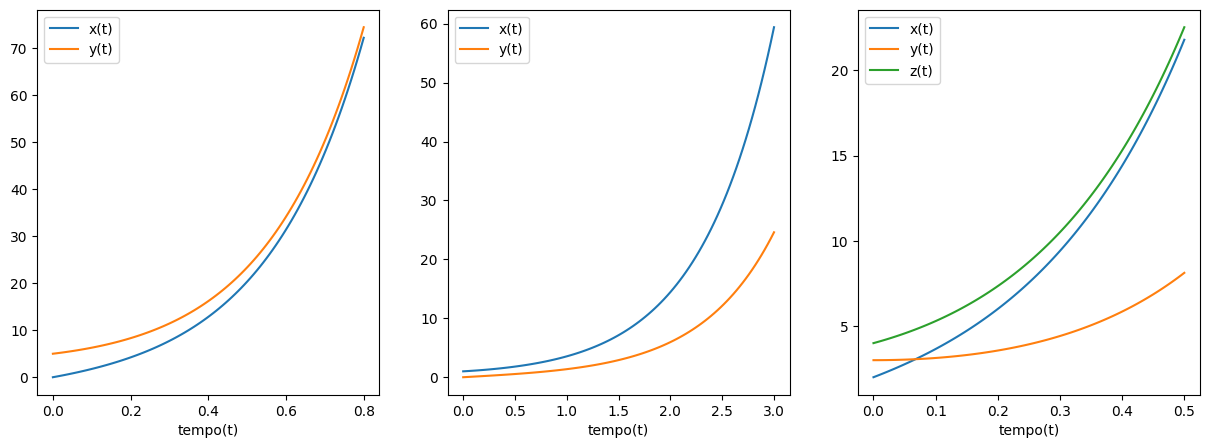

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir as funções de modo vetorial/matricial
def funcA(t):
    x = np.zeros((len(t),2))
    x[:,0] = -3*np.exp(-t)+3*np.exp(4*t)
    x[:,1] = 2*np.exp(-t)+3*np.exp(4*t)
    return x

def funcB(t):
    x = np.zeros((len(t),2))
    x[:,0] = (2+2**0.5)*np.exp((2**0.5)*t)/4+(2-2**0.5)*np.exp(-(2**0.5)*t)/4
    x[:,1] = (2**0.5)*np.exp((2**0.5)*t)/4+(-2**0.5)*np.exp(-(2**0.5)*t)/4
    return x

def funcC(t):
    x = np.zeros((len(t),3))
    x[:,0] = -np.exp(-2*t)+3*np.exp(4*t)
    x[:,1] = 2*np.exp(-2*t)+np.exp(4*t)
    x[:,2] = np.exp(-2*t)+3*np.exp(4*t)
    return x

# Plotar os gráficos das funções
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
t = np.linspace(0,0.8,100)
plt.plot(t,funcA(t))
plt.xlabel('tempo(t)')
plt.legend(['x(t)','y(t)'])

plt.subplot(1,3,2)
t = np.linspace(0,3,100)
plt.plot(t,funcB(t))
plt.xlabel('tempo(t)')
plt.legend(['x(t)','y(t)'])

plt.subplot(1,3,3)
t = np.linspace(0,0.5,100)
plt.plot(t,funcC(t))
plt.xlabel('tempo(t)')
plt.legend(['x(t)','y(t)','z(t)'])

plt.show()